# Introduction to Quantum Computing Project
## Traveling Salesman Problem

**Students**
* Matheus Silva Melo de Oliveira
* Nívea de Abreu Dantas Lima

# The Traveling Salesman Problem

The Traveling Salesman Problem (TSP) is a well-known and notoriously complex problem in the field of combinatorial optimization. It is often used to exemplify the challenges and computational difficulties associated with solving optimization problems. TSP can be succinctly described as follows:

**Problem Statement:**

*Given a list of cities and the distances between each pair of cities, the objective of the TSP is to find the shortest possible route that visits each city exactly once and returns to the starting city.*

## Complexity

TSP belongs to a class of problems known as NP-hard (Nondeterministic Polynomial-time hard), which means that it is computationally intractable to find an optimal solution in polynomial time as the problem size increases. The complexity of TSP arises from several factors:

1. **Exponential Growth**: As the number of cities (n) increases, the number of possible routes to consider grows factorially, making the problem's solution space explode. There are n! (n factorial) possible permutations of cities to visit, which quickly becomes unmanageable for large values of n.

2. **Non-Polynomial Time**: TSP belongs to the class of problems that do not have known algorithms to solve them in polynomial time. This means that as the problem size grows, the time required to find an optimal solution grows exponentially.

3. **Combinatorial Nature**: TSP is a combinatorial optimization problem, which requires evaluating all possible combinations to find the optimal route. This makes it computationally demanding because it demands searching through an immense solution space.

## Computational Difficulty

The computational difficulty of TSP has several real-world implications:

1. **Resource-Intensive**: Solving TSP for a large number of cities can take a significant amount of time and computational resources, making it impractical for many real-world applications.

2. **Heuristic Approaches**: To address the computational difficulty, heuristic and approximation algorithms are often used to find near-optimal solutions. These algorithms sacrifice guaranteed optimality for computational efficiency.

3. **Applications**: TSP has applications in various fields, such as logistics, transportation, and circuit design. The computational difficulty of solving TSP has real-world implications in these domains, as finding the most efficient routes can significantly impact costs and resources.

In conclusion, the Traveling Salesman Problem is a classic example of a computationally challenging problem due to its exponential growth in solution space, non-polynomial time complexity, and combinatorial nature. While there are ways to tackle TSP, finding the optimal solution for large instances remains a daunting computational task.

## Force Brute Approach
We can iterate all permutations of paths and select the best one. 

Although it always return the optimal solution it is too expensive in computational terms.

In [1]:
import itertools

def calculate_total_distance(path, distances):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += distances[path[i]][path[i + 1]]
    total_distance += distances[path[-1]][path[0]]
    return total_distance

def brute_force_tsp(distances):
    num_cities = len(distances)
    cities = list(range(num_cities))
    shortest_path = None
    min_distance = float('inf')

    for perm in itertools.permutations(cities):
        total_distance = calculate_total_distance(perm, distances)
        if total_distance < min_distance:
            min_distance = total_distance
            shortest_path = perm

    return shortest_path, min_distance

distances = [
    [0, 29, 20, 21],
    [29, 0, 15, 18],
    [20, 15, 0, 28],
    [21, 18, 28, 0]
]

shortest_path, min_distance = brute_force_tsp(distances)
print("Shortest Path:", shortest_path)
print("Minimum Distance:", min_distance)

Shortest Path: (0, 2, 1, 3)
Minimum Distance: 74


## Heuristic Approach:

We can use one of the properties of the problem and use it to achieve good solutions in better time complexity. One possible on is selecting the nearest nodes around the current node.

In [2]:
import numpy as np

def nearest_neighbor_tsp(distances):
    num_cities = len(distances)
    unvisited_cities = list(range(num_cities))
    path = [0] 
    unvisited_cities.remove(0)

    while unvisited_cities:
        current_city = path[-1]
        nearest_city = min(unvisited_cities, key=lambda city: distances[current_city][city])
        path.append(nearest_city)
        unvisited_cities.remove(nearest_city)

    path.append(path[0])

    total_distance = sum(distances[path[i]][path[i + 1]] for i in range(num_cities))

    return path, total_distance

distances = np.array([
    [0, 29, 20, 21],
    [29, 0, 15, 18],
    [20, 15, 0, 28],
    [21, 18, 28, 0]
])

shortest_path, min_distance = nearest_neighbor_tsp(distances)
print("Shortest Path:", shortest_path)
print("Minimum Distance:", min_distance)


Shortest Path: [0, 2, 1, 3, 0]
Minimum Distance: 74


## Quantum Computing Approach

As we've seen, in classical computing, there isn't a optimal solution in polynomial time, we have to choose one to be privileged. 

However, using **Quantum parallelism** could optimize the solution and give optimial solutions in almost polynomial time.

## Why Quantum Computing can solve some NP-hard problems

Quantum computing and the concept of parallelism hold great promise in addressing NP (nondeterministic polynomial) problems, which encompass a wide range of computationally challenging issues. The core advantage of quantum computing lies in its ability to manipulate quantum bits or qubits, which can exist in multiple states simultaneously due to superposition. This inherent parallelism allows quantum computers to explore numerous potential solutions at the same time, significantly reducing the time required to find optimal answers.

Furthermore, qubits can be entangled, meaning the state of one qubit depends on the state of another. This entanglement enables the exploration of complex relationships and dependencies within NP problems, providing a powerful tool for efficient problem-solving.

One well-known algorithm that leverages quantum parallelism is Grover's algorithm, which offers a quadratic speedup for unstructured search problems, such as finding an item in an unsorted database.

In addition to superposition and entanglement, quantum annealing, a specialized form of quantum computing, can be employed to optimize solutions for specific NP problems. Quantum annealers exploit quantum tunneling to navigate complex solution spaces more efficiently.

The advantages of parallelism extend beyond quantum computing. Classical parallel computing, which involves breaking a problem into smaller subtasks that can be processed simultaneously, also plays a significant role in addressing NP problems. By distributing computational load across multiple processors or cores, parallel computing can reduce the time required for complex calculations.

In some cases, hybrid models that combine quantum and classical computing techniques are employed. These models allow quantum processors to handle the most computationally intensive portions of NP problems while classical computers manage the remaining aspects.

## Using Quantum Computing to solve TSP problem

### Defining the Quantum Oracle: Phase Estimation

Since the input for the problem is a matrix containing the respective distances from the current node to a chosen node within the node space presented in the problem. In this way, as we want to perform a search over all possible paths (permutations) and obtain all possible distances for each of these combinations, it is interesting to use a quantum phase estimation oracle that can represent all the phases related to the eigenvectors of the underlying unitary operations.

Initially, we need to create a unitary operator that can represent, in terms of complex numbers, each distance from node i to node j.

$$b_{ij} = e^{i \cdot c_{ij}}$$

Thus, for each city on the diagonal of the unitary matrix, one can construct a unitary operator U such that:

$$u_{ij}^i = b_{ij}$$

Constructing each of these "path" operators, we can see that the final operation U will be the result of tensor products.

$$U = U^{(1)} \otimes \ldots \otimes U^{(n)}$$

Once we obtain the eigenvectors of the operator U, we see that multiplying U by its own eigenvectors generates the total length of the Hamiltonian cycle. This cycle refers to a circuit or path that passes through all vertices of a graph exactly once and returns to the initial vertex. This configuration allows us to use a phase estimation algorithm to obtain the duration of any Hamiltonian cycle. We obtain the phases in the form of binary output from the phase estimation algorithm, so we can easily run the quantum algorithm to find the minimum path among all generated permutations.


# Implementing solutions

## Quantum Phase Estimation

Let's visualize the problem with graphs. Consider cities as vertices, and the cost or path between them as edges.

- Represent given distances between cities as phases.
- Connect cities with specific costs for each connection.
- Create simple operators with basic states and phase combinations.
- Apply a phase estimation algorithm to obtain all possible distances for routes.
- Use a quantum search algorithm to find the minimum distance and its corresponding route.
- This quantum approach offers a quadratic speedup over the classical brute force method, especially for a large number of cities.


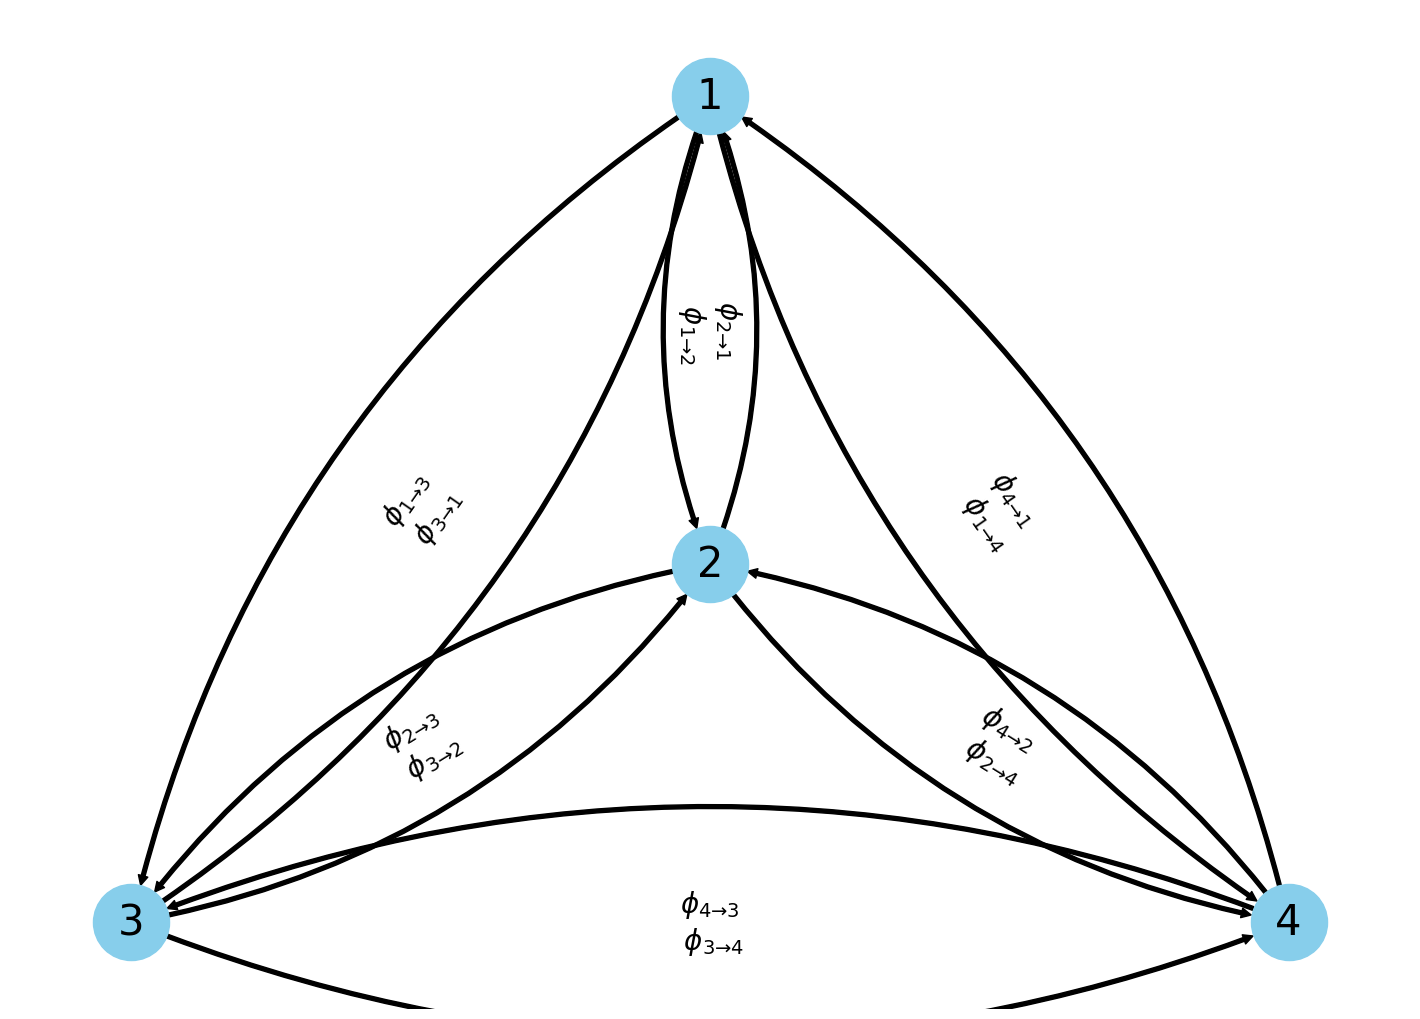

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph(directed=True)
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)

G.add_edge(2, 1)
G.add_edge(2, 3)
G.add_edge(2, 4)

G.add_edge(3, 1)
G.add_edge(3, 2)
G.add_edge(3, 4)

G.add_edge(4, 1)
G.add_edge(4, 2)
G.add_edge(4, 3)

pos = {1: [0.75, 1.0],
      2: [0.75, 0.15],
      3: [0.5, -0.5],
      4: [1.0, -0.5]}


edge_labels = {(1, 2): '$\\phi_{2\\to 1}$\n $\\phi_{1\\to 2}$',
              (1, 3): '$\\phi_{1\\to 3}$\n $\\phi_{3\\to 1}$',
              (1, 4): '$\\phi_{4\\to 1}$\n $\\phi_{1\\to 4}$',
              (2, 3): '$\\phi_{2\\to 3}$\n $\\phi_{3\\to 2}$',
              (2, 4): '$\\phi_{4\\to 2}$\n $\\phi_{2\\to 4}$',
              (3, 4): '$\\phi_{4\\to 3}$\n $\\phi_{3\\to 4}$'
              }

fig = plt.figure(1, figsize=(14, 10)) 
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos, connectionstyle='arc3, rad = 0.2', 
        node_size=3000, arrowsize=14, arrowstyle='simple', font_size=30)

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=20, bbox=dict(alpha=0))
 
plt.show()

# Quantum Traveling Salesman Problem with Quantum Phase Estimation

## Encoding Distance/Cost as Phases

We encode the distance/cost between cities as phases ($\phi$):

- $\phi_{i\to j}$ represents the cost encoded as phase from city 'i' to city 'j'.

For example:
- $\phi_{1\to 2}$ means from city/node '1' to city/node '2'.
- $\phi_{2\to 3}$ means from city/node '2' to city/node '3'.
- $\phi_{i\to i}$ represents a self-loop with cost '0'.

## Matrix Representation

The classical brute force method uses an $n\times n$ matrix ($A$) to store distances:

$$
A\ =\ \begin{bmatrix}
\phi_{1\to 1} & \phi_{1\to 2} & \phi_{1\to 3} & \phi_{1\to 4}\\
\phi_{2\to 1} & \phi_{2\to 2} & \phi_{2\to 3} & \phi_{2\to 4}\\
\phi_{3\to 1} & \phi_{3\to 2} & \phi_{3\to 3} & \phi_{3\to 4}\\
\phi_{4\to 1} & \phi_{4\to 2} & \phi_{4\to 3} & \phi_{4\to 4}\\
\end{bmatrix}
$$

Representing this matrix as phases ($B$):
$$
B\ =\ \begin{bmatrix}
e^{i\phi_{1\to 1}} & e^{i\phi_{1\to 2}} & e^{i\phi_{1\to 3}} & e^{i\phi_{1\to 4}}\\
e^{i\phi_{2\to 1}} & e^{i\phi_{2\to 2}} & e^{i\phi_{2\to 3}} & e^{i\phi_{2\to 4}}\\
e^{i\phi_{3\to 1}} & e^{i\phi_{3\to 2}} & e^{i\phi_{3\to 3}} & e^{i\phi_{3\to 4}}\\
e^{i\phi_{4\to 1}} & e^{i\phi_{4\to 2}} & e^{i\phi_{4\to 3}} & e^{i\phi_{4\to 4}}\\
\end{bmatrix}
$$

## Unitary Matrices and Quantum Phase Estimation

Constructing unitary matrices ($U_j$) for phase estimation:

$$
U_{j}\ =\ (\sum_{i=1}^{n}B[j][i]\ \times\ \text{outer product of all possible basis vectors})
$$

Generalized form:
$$
U_{j}\ =\ \begin{bmatrix}
e^{ia} & 0 & 0 & 0\\ 
0 & e^{ib} & 0 & 0\\ 
0 & 0 & e^{ic} & 0\\
0 & 0 & 0 & e^{id}
\end{bmatrix}
$$

Controlled unitaries ($CU_j$) are decomposed from $U_j$.

## Eigenstates

$U$ is a diagonal matrix, representing distinct Hamiltonian cycles:

- Number of distinct Hamiltonian cycles = $\frac{(n-1)!}{2}$ if costs are symmetric.

For each Hamiltonian cycle, eigenstates are calculated in binary form:

$$
|\psi\rangle\ =\ \otimes_{j}|i(j)-1\rangle
$$

## Quantum Phase Estimation Algorithm

Eigenvalues of $U$ are estimated using the quantum phase estimation algorithm, providing the total cost as phase. The algorithm is applied to calculate distances in the Traveling Salesman Problem.

For more details on quantum phase estimation, refer to [Quantum Phase Estimation](/course/ch-algorithms/quantum-phase-estimation) qiskit textbook page.
Let's analyze these concepts with our 4-city model:

- Our \(U_{1}, U_{2}, U_{3}, U_{4}\) is a \(4 \times 4\) matrices. So, taking the tensor product of all (\(=U\)) will give the total elements in \(U\) as \(4^4 = 256\). Out of these 256 elements, only the diagonal elements are non-zero.

- The number of distinct Hamiltonian cycles in our 4-city model is \((n-1)! = (4-1)! = 3! = 6\). And so, the number of eigenstates is 6.

- Let's see how the eigenstates are calculated:

  With 4 cities taken, the total combination of all possible Hamiltonian cycles is \(n! = 4! = 4 \times 3 \times 2 \times 1 = 24\). Out of this 24, 6 are distinct Hamiltonian cycles.

  Now, what do we mean by distinct?

  Well, let's take the following paths: \(1-2-3-4 \to 2-3-4-1 \to 3-4-1-2 \to 4-1-2-3\). If we observe carefully, we can see that \(2-3-4-1\) is just the left rotation of \(1-2-3-4\); that is, if we rotate \(1-2-3-4\) by 1, it will become \(2-3-4-1\). Similarly, if we rotate \(2-3-4-1\) by 1, we get \(3-4-1-2\), and again rotate by 1, we get \(4-1-2-3\). So, \(2-3-4-1\), \(3-4-1-2\), \(4-1-2-3\) are just the circular permutation version of \(1-2-3-4\), and most importantly, the reason we are neglecting is that all 3 will provide the same cost as \(1-2-3-4\).

  Out of all possible combinations, pick the one which, on circular permutation, will give the other combination.

  We are taking the first 6 states, since these states, on different circular permutations, will give all the states:

  | Possible States |
  | --------------- |
  | \(1-2-3-4\)     |
  | \(1-2-4-3\)     |
  | \(1-4-2-3\)     |
  | \(1-4-3-2\)     |
  | \(1-3-2-4\)     |
  | \(1-3-4-2\)     |

  These 6 distinct Hamiltonian cycles are not unique. We can also take one of the results of circular permutations in place of that. So, in place of \(1-2-3-4\), we can also take \(2-3-4-1\), as we saw above it is one of the circular permutations of \(1-2-3-4\).

  If the cost of traveling from city \(i\) to city \(j\) is the same as the cost of traveling from city \(j\) to city \(i\), then the number of distinct Hamiltonian cycles is \(\frac{(n-1)!}{2}\). So, in \(1-2-3-4\) and \(1-2-4-3\), the cost of traveling from city 3 to city 4 is the same as traveling from city 4 to city 3. So, \(1-2-3-4\) and \(1-2-4-3\) will produce the same total cost.

  If the cost of traveling from city \(i\) to city \(j\) is not the same as the cost of traveling from city \(j\) to city \(i\), then the number of distinct Hamiltonian cycles is \((n-1)! \). In our city model, it will be 3.

- Now, let's see how the eigenstates are calculated from a sequence of paths. Let's recall our function \(i(j)\), which states from which city we traveled to city \(j\), to convert it into binary form:

  $$ |\psi\rangle = \otimes_{j}|i(j)-1\rangle \text{ where } j \text{ in [1..n]} $$

  So, let's take an example, say \(1-2-3-4\):

  $$ i(1) = 4 $$

  means from city 4, we traveled to city 1. So, we need to convert it to binary form for the computational basis states. According to the formula:

  $$ |i(1)-1\rangle = |4-1\rangle = |3_{10}\rangle = |11_{2}\rangle $$

  Similarly, we have to do for all the cities in the sequence:

  $$ |i(2)-1\rangle = |1-1\rangle = |0_{10}\rangle = |00_{2}\rangle $$

  $$ |i(3)-1\rangle = |2-1\rangle = |1_{10}\rangle = |01_{2}\rangle $$

  $$ |i(4)-1\rangle = |3-1\rangle = |2_{10}\rangle = |10_{2}\rangle $$

  Finally, taking the tensor product of all:

  $$ |11\rangle \otimes |00\rangle \otimes |01\rangle \otimes |10\rangle = |11000110\rangle $$

  We found the eigenstates in binary form.

  For \(1-2-4-3\):

  $$ |i(1)-1\rangle = |3-1\rangle = |2_{10}\rangle = |10_{2}\rangle $$

  $$ |i(2)-1\rangle = |1-1\rangle = |0_{10}\rangle = |00_{2}\rangle $$

  $$ |i(4)-1\rangle = |2-1\rangle = |1_{10}\rangle = |01_{2}\rangle $$

  $$ |i(3)-1\rangle = |4-1\rangle = |3_{10}\rangle = |11_{2}\rangle $$

  $$ |10\rangle \otimes |00\rangle \otimes |01\rangle \otimes |11\rangle = |10000111\rangle $$

  Let's see all of them:
| Sequence path | Eigenstates          |
| -------------- | -------------------- |
| \(1-2-3-4\)    | $|11000110\rangle$   |
| \(1-2-4-3\)    | $|10000111\rangle$   |
| \(1-4-2-3\)    | $|10001101\rangle$   |
| \(1-4-3-2\)    | $|01001110\rangle$   |
| \(1-3-2-4\)    | $|11001001\rangle$   |
| \(1-3-4-2\)    | $|01001011\rangle$   |

If we consider the cost is the same from going and returning, there will be 3 sequence paths out of 6. For example, we can take any one of \(1-2-3-4\) or \(1-2-4-3\), since the cost from 3-4 will be the same as 4-3. So these 6 will reduce to:

| Sequence path | Eigenstates          |
| -------------- | -------------------- |
| \(1-2-3-4\)    | $|11000110\rangle$   |
| \(1-4-2-3\)    | $|10001101\rangle$   |
| \(1-3-2-4\)    | $|11001001\rangle$   |

### Quantum Phase Estimation: Building Unitaries

In the context of quantum phase estimation, constructing the unitary matrix $U$ is a pivotal step. This involves creating $CU_{1},\ CU_{2},\ CU_{3},\ CU_{4}$, where each $U_{j}$ is decomposed using controlled-unitaries.

The general form of $U_{j}$ is given by:

$$[U_{j} = \begin{bmatrix}e^{ia} & 0 & 0 & 0\\ 0 & e^{ib} & 0 & 0\\ 0 & 0 & e^{ic} & 0\\ 0 & 0 & 0 & e^{id}\end{bmatrix}]$$

Breaking this down, we find $U_{j} = U1(c-a) \otimes U1(b-a) \otimes U1(a) \otimes CCU1(d-c+a-b)$. Here, $U1(\lambda) = P(\lambda) = \begin{bmatrix}1 & 0\\ 0 & e^{i\lambda}\end{bmatrix}$.

To extend $U_{j}$ to $CU_{j}$, we transition from a $4x4$ to an $8x8$ matrix:

$$[CU_{j} = \begin{bmatrix}e^{ia} & 0 & 0 & 0\\ 0 & e^{ib} & 0 & 0\\ 0 & 0 & e^{ic} & 0\\ 0 & 0 & 0 & e^{id}\end{bmatrix} \to \begin{bmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 0 & e^{ia} & 0 & 0 & 0\\ 0 & 0 & 0 & 0 & 0 & e^{ib} & 0 & 0\\ 0 & 0 & 0 & 0 & 0 & 0 & e^{ic} & 0\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & e^{id}\end{bmatrix}]$$

In this conversion, each $U1$ becomes a $CU1$ and $CCU1(d-c+a-b)$ becomes a $CCU1(d-c+a-b)$. This process is a key element in quantum phase estimation, paving the way for further quantum algorithm development.

*For a detailed derivation and theoretical foundation, refer to the [Qiskit Textbook](/course/ch-states/single-qubit-gates) on Phase Gates and related concepts.*


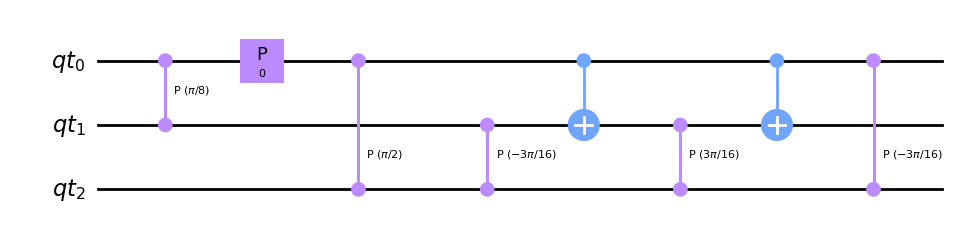

In [3]:
from qiskit import QuantumCircuit, Aer, QuantumRegister, ClassicalRegister, execute
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.circuit.library import QFT
from numpy import pi

at = 0
bt = pi/2
ct = pi/8
dt = pi/4

qt = QuantumRegister(3, 'qt')
qct = QuantumCircuit(qt)

qct.cp(ct - at, qt[0], qt[1])
qct.p(at, qt[0])
qct.cp(bt - at, qt[0], qt[2])

qct.cp((dt - ct + at - bt)/2, qt[1], qt[2])
qct.cx(qt[0], qt[1])
qct.cp(-(dt - ct + at - bt)/2, qt[1], qt[2])
qct.cx(qt[0], qt[1])
qct.cp((dt - ct + at - bt)/2, qt[0], qt[2])

qct.draw()

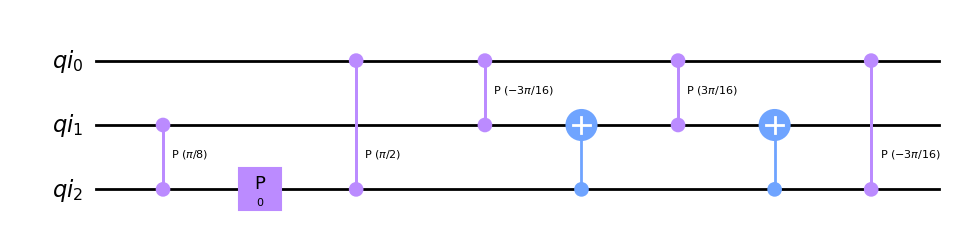

In [4]:
#Reverting the circuit
ai = 0
bi = pi/2
ci = pi/8
di = pi/4

qi = QuantumRegister(3, 'qi')
qci = QuantumCircuit(qi)


qci.cp(ci - ai, qi[2], qi[1])
qci.p(ai, qi[2])
qci.cp(bi - ai, qi[2], qi[0])

qci.cp((di - ci + ai - bi)/2, qi[1], qi[0])
qci.cx(qi[2], qi[1])
qci.cp(-(di - ci + ai - bi)/2, qi[1], qi[0])
qci.cx(qi[2], qi[1])
qci.cp((di - ci + ai - bi)/2, qi[2], qi[0])

qci.draw()

### Building the algorithm


Now lets build the whole circuit part by part, by unitaries, and by eigenstates.

$CU_{j}$

In [5]:
def controlled_unitary(qc, qubits: list, phases: list): # x,y,z = Specific Qubit; a,b,c,d = Phases
    qc.cp(phases[2]-phases[0], qubits[0], qubits[1]) # controlled-U1(c-a)
    qc.p(phases[0], qubits[0]) # U1(a)
    qc.cp(phases[1]-phases[0], qubits[0], qubits[2]) # controlled-U1(b-a)
    
    # controlled controlled U1(d-c+a-b)
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp(-(phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[0], qubits[2])

 $U\ =\ U_{1}\ \otimes\ U_{2}\ \otimes\ U_{3}\ \otimes\ U_{4}$

In [6]:
def U(times, qc, unit, eigen, phases: list): # a,b,c = phases for U1; d,e,f = phases for U2; g,h,i = phases for U3; j,k,l = phases for U4; m_list=[m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l]
    controlled_unitary(qc, [unit[0]]+eigen[0:2], [0]+phases[0:3])
    controlled_unitary(qc, [unit[0]]+eigen[2:4], [phases[3]]+[0]+phases[4:6])
    controlled_unitary(qc, [unit[0]]+eigen[4:6], phases[6:8]+[0]+[phases[8]])
    controlled_unitary(qc, [unit[0]]+eigen[6:8], phases[9:12]+[0])

$CU$, $CU^{2}$, $CU^{4}$, $CU^{8}$, $CU^{16}$, $CU^{32}$

In [7]:
def final_U(times, eigen, phases: list):
    unit = QuantumRegister(1, 'unit')
    qc = QuantumCircuit(unit, eigen)
    for _ in range(2**times):
        U(times, qc, unit, eigen, phases)
    return qc.to_gate(label='U'+'_'+(str(2**times)))

In all phases in the problem:

The phases are normalized to be bound within $[0,\ 2π]$ once we know the range of distances between the cities.

<table>
    <tr>
        <th>Phases</th>
        <th>Encoded as</th>
        <th>Phase value</th>
    </tr>
    <tr>
        <td>$\phi_{1\to1}$</td>
        <td></td>
        <td>$\text{0}$</td>
    </tr>
    <tr>
        <td>$\phi_{2\to1}$</td>
        <td>$\text{a}$</td>
        <td>$\frac{\pi}{2}$</td>
    </tr>
    <tr>
        <td>$\phi_{3\to1}$</td>
        <td>$\text{b}$</td>
        <td>$\frac{\pi}{8}$</td>
    </tr>
    <tr>
        <td>$\phi_{4\to1}$</td>
        <td>$\text{c}$</td>
        <td>$\frac{\pi}{4}$</td>
    </tr>
    <tr>
        <td>$\phi_{1\to2}$</td>
        <td>$\text{d}$</td>
        <td>$\frac{\pi}{2}$</td>
    </tr>
    <tr>
        <td>$\phi_{2\to2}$</td>
        <td></td>
        <td>$\text{0}$</td>
    </tr>
    <tr>
        <td>$\phi_{3\to2}$</td>
        <td>$\text{e}$</td>
        <td>$\frac{\pi}{4}$</td>
    </tr>
    <tr>
        <td>$\phi_{4\to2}$</td>
        <td>$\text{f}$</td>
        <td>$\frac{\pi}{4}$</td>
    </tr>
    <tr>
        <td>$\phi_{1\to3}$</td>
        <td>$\text{g}$</td>
        <td>$\frac{\pi}{8}$</td>
    </tr>
    <tr>
        <td>$\phi_{2\to3}$</td>
        <td>$\text{h}$</td>
        <td>$\frac{\pi}{4}$</td>
    </tr>
    <tr>
        <td>$\phi_{3\to3}$</td>
        <td></td>
        <td>$\text{0}$</td>
    </tr>
    <tr>
        <td>$\phi_{4\to3}$</td>
        <td>$\text{i}$</td>
        <td>$\frac{\pi}{8}$</td>
    </tr>
    <tr>
        <td>$\phi_{1\to4}$</td>
        <td>$\text{j}$</td>
        <td>$\frac{\pi}{4}$</td>
    </tr>
    <tr>
        <td>$\phi_{2\to4}$</td>
        <td>$\text{k}$</td>
        <td>$\frac{\pi}{4}$</td>
    </tr>
    <tr>
        <td>$\phi_{3\to4}$</td>
        <td>$\text{l}$</td>
        <td>$\frac{\pi}{8}$</td>
    </tr>
    <tr>
        <td>$\phi_{4\to4}$</td>
        <td></td>
        <td>$\text{0}$</td>
    </tr>
</table>


In [8]:
eigen_values = ["11000110", "10001101", "11001001"]

def eigenstates(qc, eigen, index):
    for i in range(0, len(eigen)):
        if eigen_values[index][i] == '1':
            qc.x(eigen[i])
        if eigen_values[index][i] == '0':
            pass
    qc.barrier()
    return qc

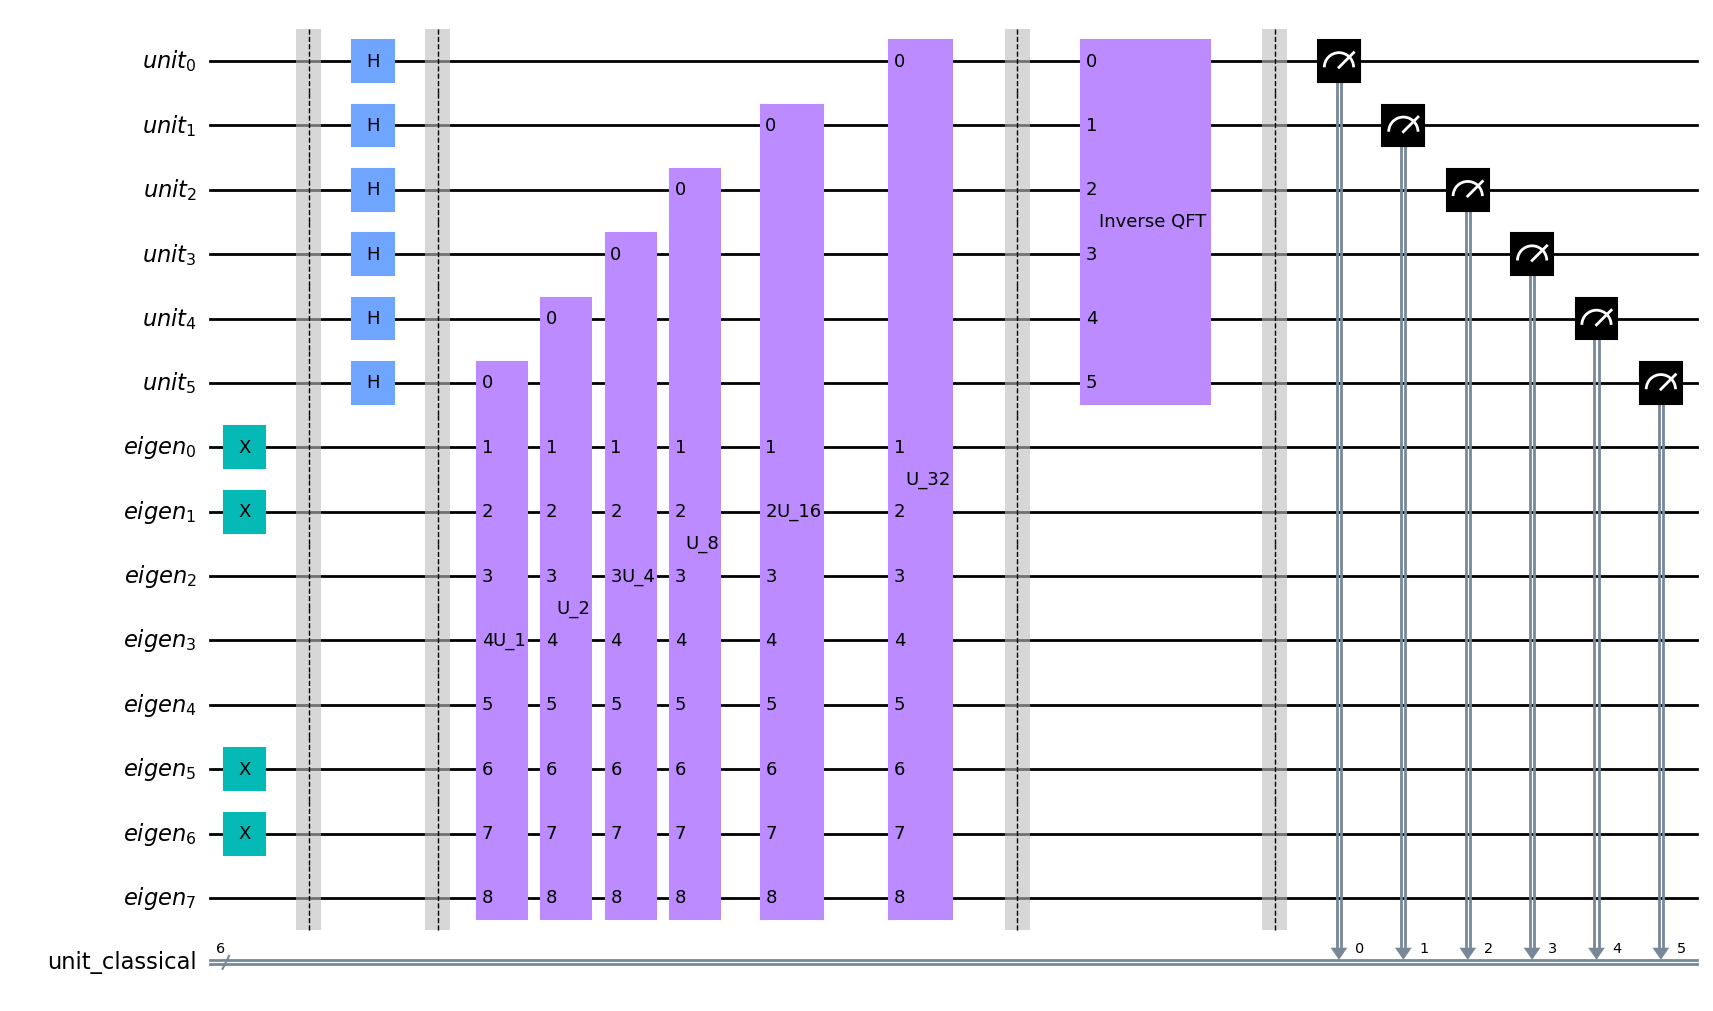

In [10]:
#Complete circuit
# Initialization
unit = QuantumRegister(6, 'unit')
eigen = QuantumRegister(8, 'eigen')
unit_classical = ClassicalRegister(6, 'unit_classical')
qc = QuantumCircuit(unit, eigen, unit_classical)
#

# Setting one eigenstate 
# Playing with the first eigenstate here i.e. 11000110 from eigen_values list.
# (Try to play with other eigenstates from the eigen_values list)
eigenstates(qc, eigen, 0)
#

# Hadamard on the 'unit' qubits
qc.h(unit[:])
qc.barrier()
#

# Controlled Unitary  
phases = [pi / 2, pi / 8, pi / 4, pi / 2, pi / 4, pi / 4, pi / 8, pi / 4, pi / 8, pi / 4, pi / 4, pi / 8] # a, b, c, d, e, f, g, h, i, j, k, l
for i in range(0, 6):
    qc.append(final_U(i, eigen, phases), [unit[5-i]] + eigen[:])
#

# Inverse QFT 
qc.barrier()
qft = QFT(num_qubits=len(unit), inverse=True, insert_barriers=True, do_swaps=False, name='Inverse QFT')
qc.append(qft, qc.qubits[:len(unit)])
qc.barrier()
#

# Measure
qc.measure(unit, unit_classical)
#

# Draw
qc.draw()

## Running in a simulator

{'100100': 8192}


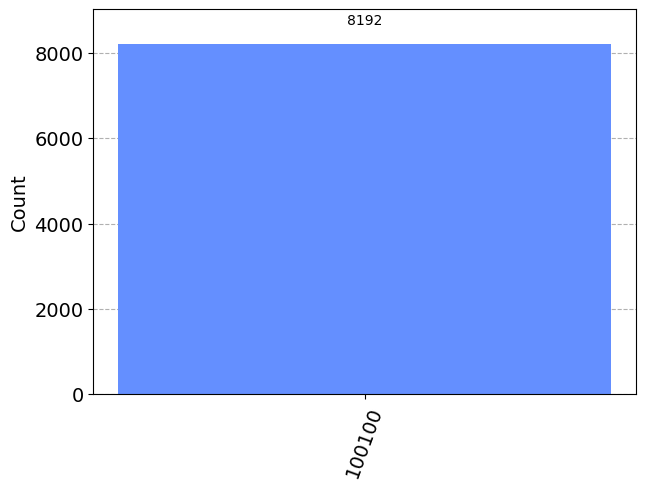

In [11]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
count = job.result().get_counts()
print(count)
plot_histogram(count)

## Executing in a Quantum Machine

In [17]:
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
t_qc = transpile(qc, backend, optimization_level=3)
job = execute(qc, backend, shots=8192)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

ibmqfactory.load_account:WARNING:2023-12-14 01:45:35,594: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


{'101010': 145, '111100': 77, '101100': 123, '000001': 134, '111010': 116, '001001': 156, '010110': 190, '100111': 131, '000111': 115, '000011': 153, '100100': 93, '011100': 136, '101110': 138, '011010': 141, '110110': 107, '110010': 120, '101001': 124, '111000': 67, '010011': 198, '100011': 134, '010100': 133, '010010': 155, '101011': 147, '100101': 81, '110100': 107, '011110': 138, '101000': 111, '100110': 110, '001111': 194, '110000': 97, '010101': 100, '001000': 110, '110111': 101, '100010': 113, '010000': 136, '110001': 115, '010001': 139, '001100': 179, '100000': 120, '000010': 136, '101101': 114, '011000': 108, '100001': 153, '111001': 82, '011001': 117, '110011': 139, '110101': 83, '001011': 198, '000100': 120, '111011': 96, '101111': 133, '111101': 76, '001010': 227, '111111': 79, '011111': 119, '001101': 139, '000000': 146, '000110': 162, '000101': 95, '111110': 84, '001110': 180, '011011': 173, '011101': 113, '010111': 136}


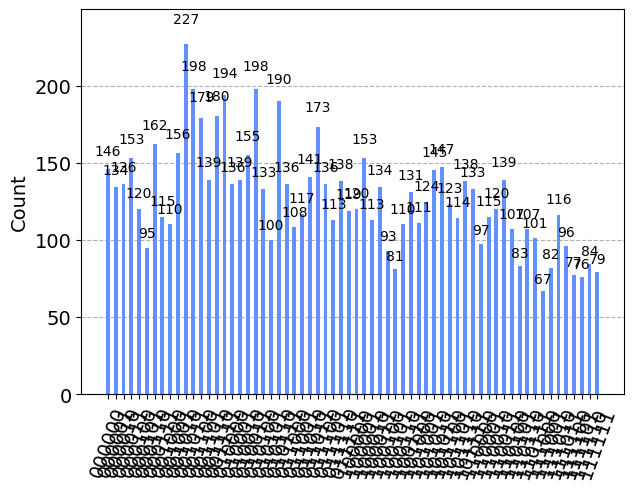

In [18]:
count = job.result().get_counts()
print(count)
plot_histogram(count)

# Variational Methods

Now we're try to solve a different approach: **solve the problem to find the optimized route using variational method.** For this, we'll use the QAOA algorithm:

#### Quantum Approximate Optimization Algorithm (QAOA)

**Problem Encoding:** Represent the optimization problem as a Hamiltonian, where the ground state corresponds to the optimal solution.

**Cost Hamiltonian ($H_C$):** Encodes the objective function of the optimization problem. The goal is to find the ground state of $H_C$, which corresponds to the optimal solution.

**Driver Hamiltonian ($H_B$):** Drives the quantum system towards a superposition of states to explore the solution space effectively.

**QAOA Circuit:** Construct a quantum circuit that applies alternating sequences of $H_C$ and $H_B$ to the initial state. The number of repetitions defines the depth of the circuit.

**Optimization Parameters:** Tune parameters in the QAOA circuit to maximize the expectation value of $H_C$ in the final state. For this case we're using COBYLA to be the optimizer.

---

QAOA provides a quantum advantage for solving complex optimization problems by leveraging quantum parallelism and superposition.


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from docplex.mp.model import Model
from qiskit_optimization.translators import from_docplex_mp
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit import Aer
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, QAOA
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.converters.quadratic_program_to_qubo import QuadraticProgramToQubo

/tmp/ipykernel_571/1659346873.py:8: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, QAOA


Generate a list which represents the latitudes and longitudes in 4 nodes.

In [2]:
coordinates = np.random.default_rng(123).uniform(low=0,high=100, size=(4,2))

Prepare the geometric assigment of each node.

In [3]:
pos = dict()
for i, coordinate in enumerate(coordinates):
    pos[i] = (coordinate[0], coordinate[1])
high = 100
low = 0
graph = nx.random_geometric_graph(n=4 , radius= np.sqrt((high - low)**2 + (high - low)**2) + 1, pos=pos) 

In [4]:
for w, v in graph.edges:
    delta = []
    for i in range(2):
        delta.append(graph.nodes[w]["pos"][i] - graph.nodes[v]["pos"][i]) 
    graph.edges[w,v]["weight"] = np.rint(np.sqrt(delta[0]**2+ delta[1]**2))

In [5]:
n = 4
index = dict(zip(list(graph), range(n)))
A = np.full((n,n),np.nan)
for u, wdict in graph.adjacency():
    for v, d in wdict.items():
        A[index[u], index[v]] = d.get("weight", 1)
A[np.isnan(A)] = 0.0
A = np.asarray(A)
M = np. asmatrix(A)
print(M)

[[ 0. 48. 91. 33.]
 [48.  0. 63. 71.]
 [91. 63.  0. 92.]
 [33. 71. 92.  0.]]


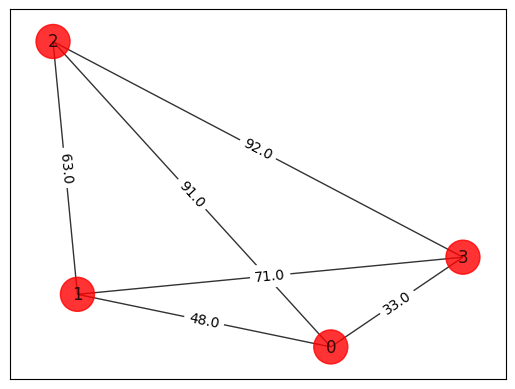

In [6]:
def draw_graph(G, colors, pos):
    default_axes = plt.axes (frameon=True)
    nx.draw_networkx(G, node_color= colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G,pos=pos, edge_labels=edge_labels)
# Draw the graph
colors = ['r' for node in graph.nodes]
pos = [graph.nodes[node]['pos'] for node in graph.nodes]
draw_graph(graph, colors, pos)

In [7]:
mdl = Model(name="TSP")
x = dict()
for i in range(n):
    for j in range (n):
        x[(i,j)]= mdl.binary_var(name=f"x_{i}_{j}")

In [8]:
C_x = mdl.sum(
    M[i, j] * x[(i, k)] * x[(j, (k + 1) % n)]
    for i in range(n)
    for j in range(n)
    for k in range(n)
    if i != j
    )
mdl.minimize(C_x)
for i in range(n):
    mdl.add_constraint(mdl.sum(x[(i,p)] for p in range(n)) == 1)
for p in range(n):
    mdl.add_constraint(mdl.sum(x[(i,p)] for i in range(n)) == 1)

In [9]:
qp = from_docplex_mp(mdl)
qubo = QuadraticProgramToQubo().convert(problem=qp)
def route_x(x):
    n = int(np.sqrt(len(x)))
    route = []
    for p in range(n):
        for i in range(n):
            if x[i * n + p]:
                route.append(i)
    return route

In [10]:
from qiskit.primitives import Sampler
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit.algorithms.optimizers import COBYLA

seed = 161812
algorithm_globals.random_seed = seed
#sampler = Sampler()
qaoa = QAOA(AerSampler(run_options={"shots": 500, "seed": seed}), COBYLA(), reps=2)
meo = MinimumEigenOptimizer(min_eigen_solver= qaoa)
result = meo.solve(qubo)
qaoa_result= np.asarray([int(y) for y in reversed (list(result))])                   
print("\nQA0A:\n", result.prettyprint())
print("\nRoute:\n", route_x(qaoa_result))


QA0A:
 objective function value: 6495.0
variable values: x_0_0=0.0, x_0_1=0.0, x_0_2=0.0, x_0_3=1.0, x_1_0=0.0, x_1_1=0.0, x_1_2=0.0, x_1_3=0.0, x_2_0=0.0, x_2_1=1.0, x_2_2=0.0, x_2_3=0.0, x_3_0=0.0, x_3_1=0.0, x_3_2=1.0, x_3_3=0.0
status: SUCCESS

Route:
 [3, 0, 1]


## Conclusion: Leveraging Quantum Computing for NP-Hard Problems, Specifically TSP

### Quantum Phase Estimation (QPE):

- QPE encodes problem constraints as phases, enabling efficient representation of combinatorial optimization problems like TSP.
- The use of eigenstates and superposition in QPE allows simultaneous exploration of multiple solutions, potentially accelerating search processes.

### Variational Approach with QAOA:

- Quantum Approximate Optimization Algorithm (QAOA) employs variational methods to iteratively improve solutions, making it adaptable for different combinatorial problems.
- QAOA leverages classical optimization in conjunction with quantum circuit evaluations, providing a hybrid strategy for more effective problem-solving.

### Advantages of Quantum Computing for NP-Hard Problems:

- **Parallelism and Superposition:** Quantum computing exploits parallelism and superposition to explore vast solution spaces concurrently, offering potential speedup for complex optimization tasks.
- **Inherent Quantum Properties:** The inherent quantum nature, including entanglement and interference, provides unique computational advantages for solving intricate optimization problems.
- **Quantum Advantage:** While quantum algorithms might not guarantee polynomial time for NP-Hard problems, they showcase the potential for exponential speedup compared to classical counterparts.

In conclusion, the synergy of Quantum Phase Estimation and Quantum Approximate Optimization Algorithm demonstrates a novel and powerful approach to tackle NP-Hard problems like TSP. Quantum computing, with its distinctive properties, presents a promising avenue for addressing challenges that classical computing struggles to overcome, opening new possibilities for optimization and computational efficiency in various domains.


## References
* https://medium.com/@vasilybokov/traveling-salesman-problem-with-quantum-optimization-solutions-and-perspectives-59137f3241cd

* https://nferrazzo.com/static/media/UNIGOU.21b0d123.pdf

* Karthik Srinivasan, Saipriya Satyajit, Bikash K Behera, and Prasanta K Panigrahi. [Efficient quantum algorithm for solving travelling salesman problem: An IBM quantum experience](https://arxiv.org/abs/1805.10928). *arXiv:1805.10928v1, 2018*.

* Adriano Barenco, Charles H. Bennett, Richard Cleve, David P. DiVincenzo, Norman Margolus, Peter Shor, Tycho Sleator, John Smolin, Harald Weinfurter. [Elementary gates for quantum computation](https://arxiv.org/abs/quant-ph/9503016). *arXiv:9503016v1, 1995*.

* https://anonymousket.medium.com/
